Lastly, I would recommend generating your prediction for kaggle using classifier probabilities for class 1, but use regression if you want, or compare/contrast

I typically submit my kaggle results as:  .predict_proba(test)[:, 1]

# Imports

In [27]:
import math
import re
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Imputer
from scipy.stats import mode
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [28]:
pd.set_option("display.max_columns", 100)

In [29]:
TRAIN_DATA = pd.read_csv("midterm_train.csv")
TEST_DATA = pd.read_csv("midterm_test.csv")
X = TRAIN_DATA
X_combined = pd.concat([X, TEST_DATA])

# Basic EDA

In [30]:
X_combined.shape

(200000, 51)

In [31]:
X_combined.head()

,x00,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-5.900707,0.469389,4.733068,9.223027,3.170787,0.024669,-2.055880,-2.045466,3.004170,0.02%,-4.685655,5.895884,12.235718,-17.658996,-19.322599,1.978951,asia,0.831200,1.980735,Jun,-1.347138,0.320392,-1.177156,-2.704137,-14.103989,-5.655715,5.481989,-1.161496,-3.931582,7.643024,3.421198,3.762529,8.698367,-6.727415,-10.732802,-0.728671,0.018602,-32.680226,-0.106695,3.913680,-5.335641,-3.694592,-1.008670,wednesday,($180.16),1.236134,4.462951,4.592803,-0.034478,3.680401,0.0
1,-3.530391,4.229818,-4.619433,2.154913,5.619903,-1.955667,7.713001,-1.279395,14.941269,0.00%,-3.103170,0.982095,3.753298,7.537105,5.942761,0.088104,asia,0.022300,-5.310811,Jun,0.898115,-1.935222,-0.398599,-0.979549,-10.746822,2.507350,1.280838,3.452034,0.624896,0.426659,2.874107,18.712973,7.312360,-15.853969,-1.455398,0.236479,-3.252878,-1.289889,14.377643,6.201034,-8.490805,6.414948,5.831287,tuesday,$432.31,-6.570015,-5.308026,-5.462467,-0.229518,-2.332947,1.0
2,1.003389,-0.012547,6.250503,3.368675,1.711321,6.192718,4.166159,-0.363055,15.175681,-0.01%,-5.424805,7.969230,-16.521783,-10.213318,9.272947,1.128275,asia,0.725844,-10.495085,July,4.546223,2.019324,4.339569,-0.205385,-15.868465,-0.501901,2.002275,0.225154,-0.882617,-14.174509,-14.707616,19.006559,2.732869,-35.200541,-21.825129,0.365506,-5.381501,16.668153,-7.932493,-0.397368,-4.172583,0.371862,-7.025987,wednesday,($119.17),-66.851394,-11.084558,-11.407072,6.395551,3.545332,0.0
3,-16.041769,-3.243507,-0.546649,-11.594427,5.111965,0.609785,-1.540136,-1.227567,-16.460535,0.00%,5.624369,9.138195,2.538420,14.740934,10.200809,-2.862860,asia,-0.358076,2.548242,Aug,-1.207699,-1.183008,-11.578898,-2.626346,15.628244,-16.420842,-6.891503,-4.772674,-0.172465,2.928158,-11.267913,-20.615756,5.138457,20.096343,11.691170,0.442023,-0.380077,29.446823,10.975024,1.148454,1.666316,-2.920478,-2.135088,thurday,"($1,309.54)",0.442939,11.808383,12.151957,-2.923916,-1.471336,0.0
4,20.498575,10.766191,1.478032,-5.723594,-0.768839,-3.482515,-11.169389,-0.361478,2.194909,-0.02%,1.331710,13.616031,2.503163,-21.545901,-31.082999,0.964522,euorpe,-0.340416,-4.412438,May,-0.504193,0.198800,-1.763387,3.767706,-13.312645,-6.421953,-3.401994,-2.892450,-5.740850,7.334497,0.836239,2.748982,7.637753,-15.819318,-7.478481,0.470682,-2.954060,-10.051513,4.656588,-5.186225,-0.757455,-1.769904,-0.532896,wednesday,"($1,103.32)",61.136654,48.077895,49.476758,1.043061,9.927952,1.0


In [32]:
X_combined.tail()

,x00,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
39995,0.608853,-0.213463,-3.538605,10.957032,5.586005,-0.238700,16.942579,1.459900,-2.747632,-0.01%,-0.070824,-8.495781,0.955410,-1.825368,8.464736,0.988800,asia,-0.121165,-7.987809,Apr,9.212888,0.855352,-0.310800,-3.211206,-6.657321,-3.572848,6.512648,6.255875,1.169474,7.945029,4.270322,-3.441232,11.050103,-2.555568,2.177949,-0.720993,6.142266,-7.251095,-8.217025,-5.909516,2.238280,7.453938,0.426583,wednesday,"$1,856.05",5.799848,6.348686,6.533406,-0.826225,-2.246642,NaN
39996,-15.654468,13.673730,-5.129639,-4.126615,-10.908006,3.049759,-7.636262,-0.937511,3.010333,0.01%,-1.063526,-18.363552,-7.694954,-17.834623,2.206712,-0.689712,asia,0.468877,-5.369584,Jun,6.847495,-1.320568,-10.622569,-1.003877,6.229476,-9.955536,-2.452780,4.456488,5.245537,-5.728256,5.784018,3.770248,0.217968,-7.909124,-4.594561,1.514454,-7.480561,20.857159,-0.637203,2.056832,-4.085614,-2.170613,-4.170406,thurday,$829.09,-41.281520,4.239135,4.362476,3.961428,-8.864676,NaN
39997,17.104347,10.881559,9.257105,9.473590,-14.404764,-0.186695,14.115917,2.043256,1.253264,-0.01%,4.195605,-2.425618,0.964887,6.451952,-14.481932,-2.597947,asia,-0.110613,-2.209304,Jun,-1.940519,-0.554571,7.117766,-3.403012,3.398249,-0.989290,5.630919,-7.483223,7.614804,9.264284,2.023665,1.569632,-0.458895,-10.484415,-1.300305,1.793511,-1.725453,-18.012855,-2.486768,-8.434629,-8.643560,1.052170,12.314406,wednesday,$362.35,28.513354,5.903222,6.074980,-0.224618,5.162458,NaN
39998,10.318173,-8.793841,-2.670998,4.655068,-1.830378,0.466101,-0.249490,-0.559953,-4.106609,0.00%,-1.936299,4.089064,-6.273545,41.568191,-7.947575,-4.105774,asia,-0.411507,0.171065,July,2.525970,0.771538,-6.505248,-1.828420,7.019153,-6.068829,2.766882,-11.287465,-5.464222,2.480790,-4.602856,-5.143262,-3.490922,6.942449,15.399632,-0.397080,-1.116342,-6.659508,11.824928,-2.964359,2.047145,1.215707,-1.343064,wednesday,"$1,157.95",34.455051,-7.569731,-7.789978,0.160228,-2.713194,NaN
39999,-3.755809,6.229565,-1.286820,-19.987559,14.423951,-2.911045,-2.361610,1.967908,9.371211,0.00%,-6.321918,4.901058,-8.610222,-16.281671,-23.917425,-4.701825,euorpe,0.067131,-11.157262,Apr,-4.618511,0.590587,-1.462620,-4.471936,-46.312562,2.128761,-11.880218,3.164557,2.248421,-14.141446,10.531698,11.736836,10.397603,-43.722423,-36.239352,-0.255263,-5.013353,3.317448,1.165515,10.797298,-3.000358,-5.960865,10.022204,wednesday,($345.83),20.461689,59.354827,61.081800,1.347046,-0.767326,NaN


In [33]:
X_combined.describe()

,x00,x01,x02,x03,x04,x05,x06,x07,x08,x10,x11,x12,x13,x14,x15,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x45,x46,x47,x48,x49,y
count,199955.000000,199961.000000,199968.000000,199953.000000,199964.000000,199961.000000,199965.000000,199968.000000,199955.000000,199956.000000,199957.000000,199957.000000,199956.000000,199955.000000,199973.000000,199951.000000,199959.000000,199957.000000,199952.000000,199973.000000,199965.000000,199963.000000,199958.000000,199963.000000,199957.000000,199963.000000,199955.000000,199962.000000,199955.000000,199959.000000,199970.000000,199951.000000,199954.000000,199960.000000,199949.000000,199952.000000,199947.000000,199965.000000,199972.000000,199957.000000,199964.000000,199967.000000,199963.000000,199968.000000,199967.000000,160000.000000
mean,1.565235,2.019043,0.004497,2.493273,0.003351,0.104421,0.014748,-0.000682,0.011391,-0.002462,0.009698,0.011928,-4.840947,-0.081032,0.005232,-0.001965,0.016539,-0.012057,-0.006955,0.001465,-0.007525,0.679520,-0.008309,1.481911,0.021713,0.026879,0.005082,0.005840,0.014156,-0.002127,0.623519,1.568972,0.000166,0.001277,-2.160839,-0.018632,0.019697,-0.010195,-0.007881,0.007071,0.892441,0.041561,0.042583,-0.010375,-0.007987,0.400550
std,16.385727,7.457627,6.800585,9.619015,6.285803,2.173690,7.751972,2.416616,9.161441,2.841331,6.957163,9.151548,20.862632,16.124566,5.128913,0.491367,8.267753,4.167318,1.637392,7.542113,4.492370,21.719806,9.391262,5.717195,5.173343,5.863793,9.012463,6.015031,11.474264,7.522088,18.980144,16.713844,0.886985,3.979747,26.513329,8.983309,6.703131,4.972479,5.426605,6.743400,24.006709,17.726981,18.242465,4.471415,3.615196,0.490011
min,-68.981217,-31.258618,-30.654468,-36.350492,-27.575136,-13.677304,-32.781282,-11.615171,-38.961689,-12.052411,-30.273867,-40.025047,-104.237473,-83.342391,-24.453882,-2.523996,-38.106567,-19.594350,-7.617655,-35.006032,-20.952168,-92.750738,-40.219166,-21.606030,-23.008337,-26.225985,-44.892792,-27.350778,-48.796996,-34.130521,-79.446630,-73.474154,-4.171814,-17.574922,-110.605481,-39.316884,-28.139802,-23.265768,-24.602106,-32.319316,-125.492433,-72.694807,-74.809917,-20.696774,-16.991354,0.000000
25%,-9.398758,-2.884242,-4.598744,-4.001572,-4.228451,-1.370610,-5.202730,-1.639600,-6.144928,-1.915681,-4.671731,-6.146342,-18.907551,-11.282904,-3.453172,-0.333321,-5.568560,-2.817904,-1.114391,-5.080651,-3.023900,-13.827175,-6.311876,-2.378454,-3.487525,-3.920167,-6.070741,-4.073222,-7.696025,-5.087663,-12.270092,-9.557933,-0.594442,-2.687913,-20.193275,-6.076416,-4.508290,-3.378067,-3.670268,-4.529229,-14.604611,-12.274292,-12.631522,-3.026798,-2.445864,0.000000
50%,1.865785,2.205135,0.000046,2.610479,-0.002882,0.061461,-0.021072,-0.001341,0.256766,-0.000199,0.031466,-0.015659,-5.010434,-0.868038,0.012581,-0.000942,0.034036,-0.014078,-0.011136,-0.008851,-0.001748,0.115547,-0.020785,1.552375,0.020799,0.014699,0.006862,0.005769,0.321541,-0.030463,0.353415,2.002073,-0.000024,0.012330,-4.210418,0.015769,0.025383,0.001823,-0.007705,0.018208,0.899817,-0.493777,-0.508342,-0.003022,-0.007593,0.000000
75%,12.809270,6.999845,4.609507,9.037185,4.255184,1.555284,5.259901,1.627245,6.268893,1.918320,4.682364,6.203790,9.201270,10.490568,3.463927,0.327183,5.586278,2.800333,1.101801,5.089474,3.029973,14.504394,6.323244,5.371105,3.518017,3.979940,6.098849,4.056464,7.851615,5.070865,13.208009,12.804321,0.599630,2.687677,14.534742,6.038816,4.548056,3.346707,3.651584,4.567184,16.595121,11.932554,12.279494,3.001140,2.427807,1.000000
max,70.882303,39.193550,29.934983,47.313496,28.571894,10.006106,34.460095,10.794778,39.216249,13.644499,31.454944,40.405604,88.087029,83.430363,25.204206,2.058315,38.344442,21.524455,7.965925,33.923253,21.199277,116.491997,41.409791,28.122227,24.931040,26.008763,39.835810,29.001638,49.115816,33.041415,90.461981,72.844096,4.011485,18.562027,116.485098,46.291216,29.862557,23.132292,22.938242,28.980718,136.368013,77.429817,79.682696,19.217507,15.117022,1.00

# Plots

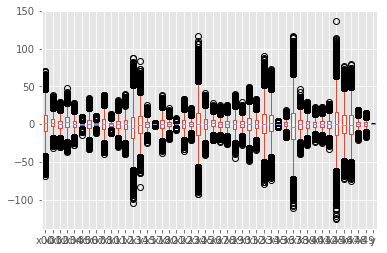

In [34]:
X_combined.plot.box()

# Basic Data Cleansing

### Parse Money to Float

In [35]:
def parseMoneyToFloat(x):
    if isinstance(x, str): return float(re.sub('[$,()]', '', x))

X_combined.x44 = [parseMoneyToFloat(x) for x in X_combined.x44]

### Parse Percent to Float

In [36]:
def parsePercentToFloat(x):
    if isinstance(x, str): return float(re.sub('%', '', x)) / 100.00

X_combined.x09 = [parsePercentToFloat(x) for x in X_combined.x09]

### Month

In [37]:
def cleanMonth(x):
    if isinstance(x, str):
        if x == 'Jun': return 'june'
        elif x == 'July': return 'july'
        elif x == 'Aug': return 'august'
        elif x == 'May': return 'may'
        elif x == 'Mar': return 'march'
        elif x == 'Apr': return 'april'
        elif x == 'sept.': return 'september'
        elif x == 'Feb': return 'february'
        elif x == 'Oct': return 'october'
        elif x == 'Nov': return 'november'
        elif x == 'January': return 'january'
        elif x == 'Dev': return 'december'

month = pd.Series([cleanMonth(x) for x in X_combined.x19], name='month')

### Weekday

In [38]:
def cleanWeekday(x):
    if isinstance(x, str):
        if x == 'monday': return 'monday'
        elif x == 'tuesday': return 'tuesday'
        elif x == 'wednesday': return 'wednesday'
        elif x == 'thurday': return 'thursday'
        elif x == 'friday': return 'friday'

weekday = pd.Series([cleanWeekday(x) for x in X_combined.x43], name='weekday')

### Region

In [39]:
def cleanRegion(x):
    if isinstance(x, str):
        if x == 'asia': return 'asia'
        elif x == 'euorpe': return 'europe'
        elif x == 'america': return 'america'

region = pd.Series([cleanRegion(x) for x in X_combined.x16], name='region')

# Random Forest Imputation of Missing Values

### Strategy

1. Impute missing categorical data with most frequent value
2. Impute missing numeric data with median (or mean) value
3. For each column run Random Forest to estimate new imputed value while holding other columns constant
4. Run second Random Forest using strategy in 3, but with RF imputed values

### Separate Numeric and Categorical Data

In [40]:
X_numeric = X_combined.copy()
X_numeric.drop(['x16', 'x19', 'x43'], axis=1, inplace=True)

### Impute Missing Categorical Data with Most Frequent Value

In [41]:
month.value_counts()[[0]]

june    55795
Name: month, dtype: int64

In [42]:
weekday.value_counts()[[0]]

wednesday    126413
Name: weekday, dtype: int64

In [43]:
region.value_counts()[[0]]

asia    173129
Name: region, dtype: int64

In [44]:
month.fillna('june', inplace=True)
weekday.fillna('wednesday', inplace=True)
region.fillna('asia', inplace=True)

### Impute Missing Numeric Data with Median
Note to Self: Reconsider median choice after further plotting above

In [45]:
y_numeric = X_numeric.pop('y')

In [46]:
meanImputer = Imputer(strategy='median', copy=False)
meanImputer.fit_transform(X_numeric)

array([[ -5.90070664e+00,   4.69388657e-01,   4.73306785e+00, ...,
          4.59280348e+00,  -3.44776760e-02,   3.68040134e+00],
       [ -3.53039065e+00,   4.22981797e+00,  -4.61943288e+00, ...,
         -5.46246671e+00,  -2.29517509e-01,  -2.33294711e+00],
       [  1.00338855e+00,  -1.25474570e-02,   6.25050323e+00, ...,
         -1.14070719e+01,   6.39555117e+00,   3.54533178e+00],
       ..., 
       [  1.71043472e+01,   1.08815589e+01,   9.25710482e+00, ...,
          6.07498027e+00,  -2.24617902e-01,   5.16245808e+00],
       [  1.03181728e+01,  -8.79384077e+00,  -2.67099784e+00, ...,
         -7.78997798e+00,   1.60228442e-01,  -2.71319396e+00],
       [ -3.75580866e+00,   6.22956464e+00,  -1.28682043e+00, ...,
          6.10818001e+01,   1.34704559e+00,  -7.67326474e-01]])

In [47]:
X_numeric['y'] = y_numeric
X_numeric['month'] = month.copy()
X_numeric['weekday'] = weekday.copy()
X_numeric['region'] = region.copy()
X_imputed = pd.get_dummies(X_numeric)
y_combined = X_imputed.pop('y')

### Random Forest Imputation

In [48]:
rfrImputer = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=10)

In [51]:
def randomForestImputation(col):
    X_i = X_imputed.copy()
    y_i = X_i.pop(col.name)
    return [cross_val_predict(rfrImputer, X_i, y_i, cv=5, n_jobs=-1) if np.isnan(x) else x for x in col]

In [57]:
X_imputed_rfr = X_imputed.apply(randomForestImputation)

In [53]:
X_imputed_rfr['y'] = y_combined

In [63]:
X_imputed.describe()
X_imputed_rfr.shape

(200000, 67)

In [61]:
X_imputed_rfr.describe()

,x00,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,x11,x12,x13,x14,x15,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x44,x45,x46,x47,x48,x49,month_april,month_august,month_december,month_february,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september,weekday_friday,weekday_monday,weekday_thursday,weekday_tuesday,weekday_wednesday,region_america,region_asia,region_europe
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000
mean,1.565302,2.019080,0.004496,2.493300,0.003350,0.104413,0.014742,-0.000682,0.011446,5.250000e-08,-0.002461,0.009703,0.011922,-4.840984,-0.081209,0.005233,-0.001965,0.016542,-0.012057,-0.006956,0.001464,-0.007524,0.679415,-0.008311,1.481924,0.021713,0.026877,0.005082,0.005840,0.014226,-0.002133,0.623479,1.569078,0.000166,0.001279,-2.161362,-0.018623,0.019699,-0.010193,-0.007881,0.007074,798.012069,0.892442,0.041472,0.042481,-0.010374,-0.007987,0.061850,0.149655,0.000060,0.001660,0.000115,0.265140,0.279370,0.012610,0.172105,0.001005,0.009390,0.047040,0.003485,0.002875,0.199935,0.162025,0.63168,0.076165,0.865475,0.058360
std,16.383884,7.456900,6.800041,9.617885,6.285238,2.173478,7.751294,2.416423,9.160411,1.040942e-04,2.841018,6.956415,9.150565,20.860337,16.122756,5.128567,0.491307,8.266905,4.166870,1.637195,7.541604,4.491977,21.717798,9.390276,5.716666,5.172787,5.863251,9.011449,6.014460,11.472974,7.521317,18.978721,16.711798,0.886883,3.979349,26.509968,8.982231,6.702242,4.972044,5.426225,6.742675,602.535076,24.004549,17.725520,18.240779,4.471057,3.614898,0.240884,0.356734,0.007746,0.040709,0.010723,0.441409,0.448691,0.111584,0.377473,0.031686,0.096446,0.211725,0.058931,0.053542,0.399952,0.368475,0.48235,0.265263,0.341216,0.234424
min,-68.981217,-31.258618,-30.654468,-36.350492,-27.575136,-13.677304,-32.781282,-11.615171,-38.961689,-5.000000e-04,-12.052411,-30.273867,-40.025047,-104.237473,-83.342391,-24.453882,-2.523996,-38.106567,-19.594350,-7.617655,-35.006032,-20.952168,-92.750738,-40.219166,-21.606030,-23.008337,-26.225985,-44.892792,-27.350778,-48.796996,-34.130521,-79.446630,-73.474154,-4.171814,-17.574922,-110.605481,-39.316884,-28.139802,-23.265768,-24.602106,-32.319316,0.010000,-125.492433,-72.694807,-74.809917,-20.696774,-16.991354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-9.396778,-2.883709,-4.597682,-3.998651,-4.227064,-1.370306,-5.201461,-1.639423,-6.142456,-1.000000e-04,-1.915206,-4.670752,-6.145446,-18.904001,-11.280705,-3.452068,-0.333247,-5.566447,-2.817142,-1.114000,-5.079801,-3.023398,-13.823482,-6.310832,-2.376947,-3.487027,-3.919371,-6.069519,-4.072150,-7.692592,-5.086202,-12.265998,-9.554325,-0.594292,-2.686985,-20.190467,-6.075276,-4.506602,-3.377403,-3.669475,-4.528211,320.010000,-14.600952,-12.272912,-12.630001,-3.026428,-2.445374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [54]:
cat_col_names =['month_december', 'month_february', 'month_january', 'month_july', 'month_june', 'month_march', 'month_may', 'month_november', 'month_october', 'month_september', 'weekday_friday', 'weekday_monday', 'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday', 'region_america', 'region_asia', 'region_europe']
[1 if x >= 0.5 else 0 for x in X_imputed_rfr[cat_col_names]]

TypeError: '>=' not supported between instances of 'str' and 'float'

In [ ]:
X_imputed_rfr.to_csv(path="imputed_values.csv")

<hr>

# Train Model

### Test-Train Split

In [ ]:
# X TEST
X_test = X_imputed_rfr[np.isnan(X_imputed_rfr.y)].copy()
X_test.drop('y', axis=1, inplace=True)

# Xy TRAIN
Xy_train = X_test.dropna(subset=['y'])

# y TRAIN
y_train = Xy_train['y'].copy()

# X TRAIN
X_train = Xy_train.drop('y', axis=1)

### Random Forest Regressor with Cross Validation and Grid Search

In [ ]:
# set hyperparameters
n_estimators=[5, 10, 50, 100]
criterion=['gini', 'entropy']
max_features=['auto', 'log2', None]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_features=max_features)

In [ ]:
rfc = RandomForestClassifier(random_state=42, verbose=10, n_jobs=2)

In [ ]:
rfc_estimator = GridSearchCV(rfc, hyperparameters, scoring='roc_auc', cv=5, verbose=10, n_jobs=-1)
rfc_estimator.fit(X_train, y_train)
best_rfc = rfc_estimator.best_estimator_
print(best_rfc)

In [ ]:
def getMeanAndConfidence(scores, scoring, name):
    mean_score = scores.mean()
    std_dev = scores.std()
    std_error = scores.std() / math.sqrt(scores.shape[0])
    ci =  2.262 * std_error
    lower_bound = mean_score - ci
    upper_bound = mean_score + ci
    print ("%s is %f +/-  %f" % (name, mean_score, ci))
    print ('95 percent probability that if this experiment were repeated over and over the average %s score would be between %f and %f' % (scoring, lower_bound, upper_bound))

In [ ]:
# cross validation
roc_auc = cross_val_score(best_rfr, X_train, y_train, cv=5, scoring='roc_auc')
getMeanAndConfidence(roc_auc, 'roc_auc', 'RFC')

In [ ]:
y_hat_prob = best_rfc.predict_proba(X_test)

In [ ]:
y_hat_prob.to_csv(path="rfc_probabilities.csv")